In [1]:
steps = [(1,0),(-1,0),(0,1),(0,-1),(1,1),(1,-1),(-1,-1),(-1,1)]
def generate_walks2(path, L, cache):
    if L == 0:
        cache.append(path)
    else:
        for dx, dy in steps:
            x, y = path[-1]
            pp = path[:]
            pp.append((x + dx, y + dy))
            generate_walks2(pp, L - 1, cache)
def sr_vector(cache, L):
    a1 = 0
    b1 = 0
    for i in range(len(cache)):
        a,b = cache[i][L]
        a1 += a
        b1 += b  
    return (a1, b1)
def distance(cache, L):
    d = 0
    for j in range(len(cache)):
        a2, b2 = cache[j][L]
        d += (a2**2 + b2**2)**0.5
    return d/len(cache)
def sq_distance(cache, L):
    sq = 0
    for m in range(len(cache)):
        sq += cache[m][L][0]**2 + cache[m][L][1]**2
    return sq/len(cache)   
cache = []
L = 3
generate_walks2([(0,0)], L, cache)
print("количество траекторий длиной L = ", len(cache), ", (2d)^L = ", 4**L)
print("координаты результирующего (среднего по всем траекториям) вектора:", sr_vector(cache, L))
print("среднее смещение: ",'%.2f' % distance(cache, L), ", L^0.5 =", '%.2f' % L**0.5)
print("средний квадрат смещения ", sq_distance(cache, L),", L =",L)

количество траекторий длиной L =  512 , (2d)^L =  64
координаты результирующего (среднего по всем траекториям) вектора: (0, 0)
среднее смещение:  1.91 , L^0.5 = 1.73
средний квадрат смещения  4.5 , L^1 = 3


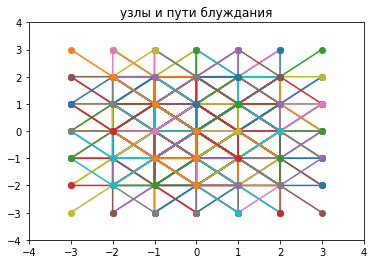

In [3]:
import matplotlib.pyplot as plt
for i in range(len(cache)):
    z0 = []
    z1 = []
    for j in range(L+1):
        z0.append(cache[i][j][0])
        z1.append(cache[i][j][1])
    plt.plot(z0, z1, "-o")
plt.xlim([-(L+1), L+1])
plt.ylim([-(L+1), L+1])
plt.title("узлы и пути блуждания")
plt.show()

In [4]:
def generate_walks3(path, L, cache):
    if L == 0:
        cache.append(path)
    else:
        for dx, dy in steps:
            x, y = path[-1]
            pp = path[:]
            x1, y1 = x + dx, y + dy
            if (x1, y1) not in pp:
                pp.append((x1, y1))
                generate_walks3(pp, L - 1, cache)
def sr_vector(cache, L):
    a1 = 0
    b1 = 0
    for i in range(len(cache)):
        a,b = cache[i][L]
        a1 += a
        b1 += b  
    return (a1, b1)
def distance(cache, L):
    d = 0
    for j in range(len(cache)):
        a2, b2 = cache[j][L]
        d += (a2**2 + b2**2)**0.5
    return d/len(cache)
def sq_distance(cache, L):
    sq = 0
    for m in range(len(cache)):
        sq += cache[m][L][0]**2 + cache[m][L][1]**2
    return sq/len(cache)   
cache = []
L = 3
generate_walks3([(0,0)], L, cache)
print("количество траекторий длиной L = ", len(cache), ", (2d)^L = ", 3)
print("координаты результирующего (среднего по всем траекториям) вектора:", sr_vector(cache, L))
print("среднее смещение: ",'%.2f' % distance(cache, L), ", L^0.5 =", '%.2f' % L**0.5)
print("средний квадрат смещения ",'%.2f' % sq_distance(cache, L),", L^(3/2) =",'%.2f' % L**(3/2))

количество траекторий длиной L =  368 , (2d)^L =  3
координаты результирующего (среднего по всем траекториям) вектора: (0, 0)
среднее смещение:  2.27 , L^0.5 = 1.73
средний квадрат смещения  5.77 , L^(3/2) = 5.20
